In [1]:
import numpy as np
from src.sipm_signals import sipm_therm, nois_therm, sipm_adc
from src.sipm_signals.nn_cam import NN
from src.genetic_algorithm.algorithm import GeneticAlgorithm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import time
%matplotlib inline

ImportError: cannot import name 'NN' from partially initialized module 'src.sipm_signals.nn_cam' (most likely due to a circular import) (/home/alperenaksoy/development/SiPM_BNN-hdl-py-gen/sipm_bnn-python-package/src/sipm_signals/nn_cam.py)

In [3]:
# =============================
# Global Constants
# =============================
ADC_BITS: int = 12
ADC_SAMPLES: int = 128

ADC_MAX: int  = 2 ** ADC_BITS - 1
ADC_ZERO: int = 2 ** ( ADC_BITS - 1 ) - 0 # TODO: why -0?
ADC_MIN: int = 0

In [4]:
def to_hex(x, pos):
    return '0x%x' % int(x)

fmt = ticker.FuncFormatter(to_hex)

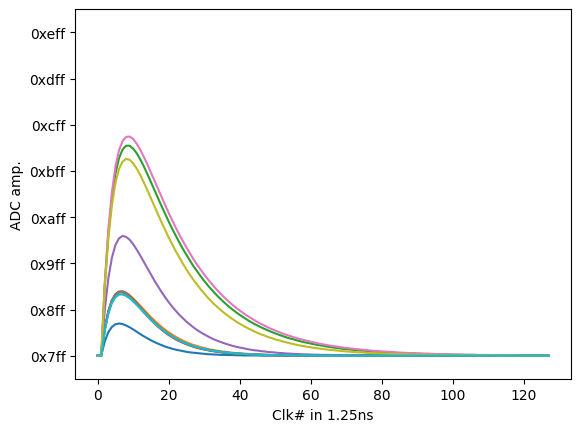

In [5]:
for i in range(10):
    plt.plot(*sipm_adc())
plt.xlabel("Clk# in 1.25ns")
plt.ylabel("ADC amp.")
plt.ylim([2048-128,4096-128])
plt.gca().get_yaxis().set_major_locator(ticker.MultipleLocator(ADC_MAX/16))
plt.gca().get_yaxis().set_major_formatter(fmt)
plt.gcf().patch.set_alpha(0.0)

In [ ]:
nn = NN(
        NN = (2, 8, 2), 
        neur_len=2, 
        bias_len=2, 
        wght_len=2
    )
    # nnwgth = nn.conv_from_indi_to_wght(individual)
    # nnsummap = nn.conv_from_indi_to_summap(individual)

In [ ]:
def fitness_function(individual: np.ndarray) -> float:
    """
    Example fitness function using NN with SiPM signals.
    Higher score if NN correctly distinguishes signal vs noise.
    """
    

    Train_D_good = np.array([sipm_therm() for _ in range(2)], dtype=np.uint8)
    Train_D_bad = np.array([nois_therm() for _ in range(2)], dtype=np.uint8)

    correct_good = np.sum([np.all(nn.run_nn(x) == 1) for x in Train_D_good])
    correct_bad = np.sum([np.all(nn.run_nn(x) == 0) for x in Train_D_bad])

    # Combine scores
    score = correct_good + correct_bad
    return float(score)

In [4]:
# GA parameters
genome_length = 64  # smaller genome for quick test
mutation_prob = 0.05
pop_size = 10       # small population for demo
ngen = 5            # few generations

ga = GeneticAlgorithm(
    fitness_function=fitness_function,
    genome_length=genome_length,
    mutation_prob=mutation_prob,
    pop_size=pop_size,
    ngen=ngen,
    elite_size=2
)

pop, log, hof = ga.run()

print("\n--- Best Individual ---")
print("Genome:", hof[0])
print("Fitness:", hof[0].fitness.values[0])

Create init population...


ValueError: operands could not be broadcast together with shapes (8,2) (2048,) 